# TOPIC: Analysis of Household Power Consumption in Gyalpozhing
## Group 6
1. Anisha Rai (12190041)
2. Rashmi Gurung (12190072)
3. Sonam Dema (12190081)
4. Tashi Namgay (12190086)

#1. IMPORT LIBRARIES

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from matplotlib import pyplot as plt


#2. LOAD DATA

In [282]:
#Load data

main_df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

,BP Number,BP_name,CA_number,portion,posting_Date,Due Date,Billing Period,Print Doc. No.,Billing Doc. No.,consumption,...,current,voltage,energy_Charges,Demand Charges,Penalty Charges,Recon Key,G/L Account,Category,FICA Doument no,Search term1
0,1702371.0,Company Lemon Grass Factory Kurizampa,50000504.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,167.0,...,1.166136,234.0,589.51,0.0,0.00,19015R040045,300002,LV Agricultural,4.000049e+11,LEMON FACTORY
1,1705727.0,Company RBA Gyelposhing,50001004.0,P17_41,2019-01-02,2019-02-01,2019/01,4.003612e+09,9.018221e+09,788.0,...,5.502486,234.0,2781.64,0.0,0.00,190115R4/17,300002,LV Agricultural,9.434803e+07,"RAMS, GYELPOSHING"
2,1702588.0,N R D C Gyelposhing,60001500.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,N R D C
3,1702586.0,Swerage Treatment Plant,60000307.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,SWERAGE PLANT
4,1709983.0,Company Rabsel Construction Pvt.Ltd Gyelposhing,60006107.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,1880.0,...,13.127758,234.0,7557.60,0.0,463.18,19015R040045,300003,LV Bulk,4.000049e+11,RABSEL CONSTRUCTION


# 3. DATA PREPROCESSING 

In [283]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['Category','portion','posting_Date','current','voltage','consumption','energy_Charges'])
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
25377,LV Urban Domestic Customers,P17_40,2022-03-02,3.505391,234.0,502.0,1207.28
25378,MV Industrial,P17_41,2022-03-02,830.316742,234.0,118908.0,315106.20
25379,LV Bulk,P17_41,2022-03-16,0.000000,234.0,0.0,0.00
25380,NaN,NaN,NaT,NaN,NaN,NaN,NaN
25381,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [284]:
df.isna().sum()

Category          2
portion           2
posting_Date      2
current           2
voltage           2
consumption       2
energy_Charges    2
dtype: int64

In [285]:
df = df.dropna()
df.isna().sum()

Category          0
portion           0
posting_Date      0
current           0
voltage           0
consumption       0
energy_Charges    0
dtype: int64

In [286]:
# Selecting the data from 2019 till 2021 only:

df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
23602,LV Urban Domestic Customers,P17_41,2021-12-02,0.796045,234.0,114.0,165.52
23603,LV Urban Domestic Customers,P17_41,2021-12-02,1.529244,234.0,219.0,446.92
23604,LV Urban Domestic Customers,P17_41,2021-12-02,0.628457,234.0,90.0,115.20
23605,LV Urban Domestic Customers,P17_41,2021-12-02,0.733199,234.0,105.0,141.40
23606,LV Urban Domestic Customers,P17_41,2021-12-02,0.279314,234.0,40.0,51.20


In [287]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [288]:
df.dtypes

Category           object
portion            object
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

In [289]:
df

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
0,LV Agricultural,P17_41,1.166136,234.0,167.0,589.51,2019,1
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
2,LV Bulk,P17_41,0.000000,234.0,0.0,0.00,2019,1
3,LV Bulk,P17_41,0.000000,234.0,0.0,0.00,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1
...,...,...,...,...,...,...,...,...
23602,LV Urban Domestic Customers,P17_41,0.796045,234.0,114.0,165.52,2021,12
23603,LV Urban Domestic Customers,P17_41,1.529244,234.0,219.0,446.92,2021,12
23604,LV Urban Domestic Customers,P17_41,0.628457,234.0,90.0,115.20,2021,12
23605,LV Urban Domestic Customers,P17_41,0.733199,234.0,105.0,141.40,2021,12


In [290]:
df.isna().sum()

Category          0
portion           0
current           0
voltage           0
consumption       0
energy_Charges    0
Year              0
Month             0
dtype: int64

In [291]:
df.duplicated().sum()

5952

In [292]:
gyalpozhing_df = df.drop_duplicates()

In [293]:
df.shape

(23607, 8)

# 4. DETECTING OUTLIERS

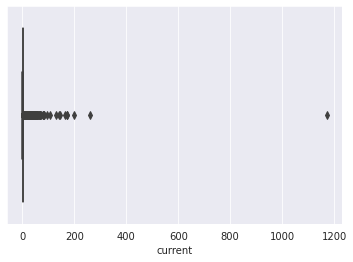

In [294]:
sns.boxplot(x = gyalpozhing_df['current'])
plt.show()

In [295]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = gyalpozhing_df.current.quantile(0.25)
q3 = gyalpozhing_df.current.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [296]:
gyalpozhing_df[(gyalpozhing_df.current < ll)  | (gyalpozhing_df.current > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1
5,LV Bulk,P17_41,48.600637,234.0,6960.0,27979.20,2019,1
7,LV Bulk,P17_41,7.262164,234.0,1040.0,4180.80,2019,1
8,LV Bulk,P17_41,10.048321,234.0,1439.0,5784.78,2019,1
...,...,...,...,...,...,...,...,...
23469,LV Urban Domestic Customers,P17_41,11.668343,234.0,1671.0,5462.44,2021,12
23523,LV Urban Domestic Customers,P17_41,5.816714,234.0,833.0,2412.12,2021,12
23583,LV Urban Domestic Customers,P17_41,7.422770,234.0,1063.0,3249.32,2021,12
23584,LV Urban Domestic Customers,P17_41,8.100106,234.0,1160.0,3602.40,2021,12


In [297]:
df1 = gyalpozhing_df[(gyalpozhing_df.current > ll) & (gyalpozhing_df.current < ul)]
df1.shape

(16039, 8)

<function matplotlib.pyplot.show>

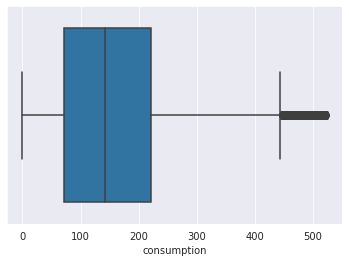

In [298]:
sns.boxplot(x = df1['consumption'])
plt.show

In [299]:
q1 = df1.consumption.quantile(0.25)
q3 = df1.consumption.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [300]:
ul

444.2975

In [301]:
ll

-151.16250000000002

In [302]:
df1[(df1.consumption < ll)  | (df1.consumption > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
40,LV Commercial,P17_41,3.568236,234.0,511.0,1803.83,2019,1
52,LV Commercial,P17_41,3.456511,234.0,495.0,1747.35,2019,1
79,LV Institutional,P17_41,3.638065,234.0,521.0,1839.13,2019,1
81,LV Institutional,P17_41,3.631082,234.0,520.0,1835.60,2019,1
97,LV Institutional,P17_41,3.421597,234.0,490.0,1729.70,2019,1
...,...,...,...,...,...,...,...,...
23346,LV Urban Domestic Customers,P17_41,3.477459,234.0,498.0,1194.64,2021,12
23394,LV Urban Domestic Customers,P17_40,3.526339,234.0,505.0,1218.20,2021,12
23401,LV Urban Domestic Customers,P17_41,3.484442,234.0,499.0,1197.32,2021,12
23484,LV Urban Domestic Customers,P17_41,3.386682,234.0,485.0,1159.80,2021,12


In [303]:
ll

-151.16250000000002

In [304]:
df2 = df1[(df1.consumption > ll) & (df1.consumption < ul)]
df2.shape

(15663, 8)

<function matplotlib.pyplot.show>

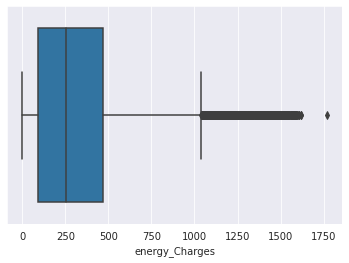

In [305]:
sns.boxplot(x = df2['energy_Charges'])
plt.show

In [306]:
q1 = df2.energy_Charges.quantile(0.25)
q3 = df2.energy_Charges.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [307]:
df2[(df2.energy_Charges < ll)  | (df2.energy_Charges > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
15,LV Commercial,P17_41,3.037540,234.0,435.0,1535.55,2019,1
25,LV Commercial,P17_41,2.953746,234.0,423.0,1493.19,2019,1
31,LV Commercial,P17_41,2.918831,234.0,418.0,1475.54,2019,1
41,LV Commercial,P17_41,2.890900,234.0,414.0,1461.42,2019,1
45,LV Commercial,P17_41,2.800123,234.0,401.0,1415.53,2019,1
...,...,...,...,...,...,...,...,...
23150,LV Temporary,P17_41,2.234512,234.0,320.0,1164.80,2021,12
23151,LV Temporary,P17_41,2.667449,234.0,382.0,1390.48,2021,12
23154,LV Temporary,P17_41,2.430032,234.0,348.0,1266.72,2021,12
23163,LV Temporary,P17_41,3.100385,234.0,444.0,1616.16,2021,12


In [308]:
df3 = df2[(df2.energy_Charges > ll) & (df2.energy_Charges < ul)]
df3.shape

(15062, 8)

# 5.  EDA and VISUALIZATION

Text(0.5, 1.0, 'Yearly Change of Consumption')

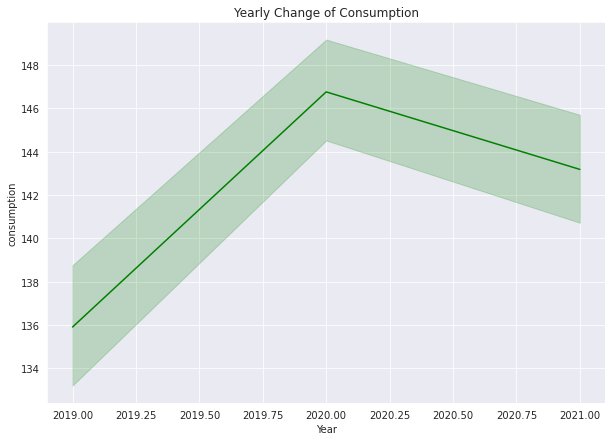

In [309]:
#yearly change of Consumption

plt.figure(figsize=(10,7))
sns.lineplot(x="Year", y="consumption", color='green',data=df3)
plt.xticks=(2019,2020,2021)
plt.title("Yearly Change of Consumption")

Text(0.5, 1.0, 'Yearly Change of Consumption')

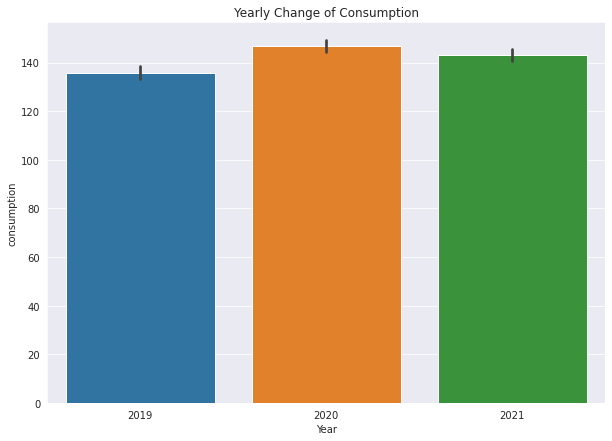

In [310]:
plt.figure(figsize=(10,7))
sns.barplot(x="Year", y="consumption",data=df3)
plt.title("Yearly Change of Consumption")

Text(0.5, 1.0, 'Yearly Change of Energy_Charges')

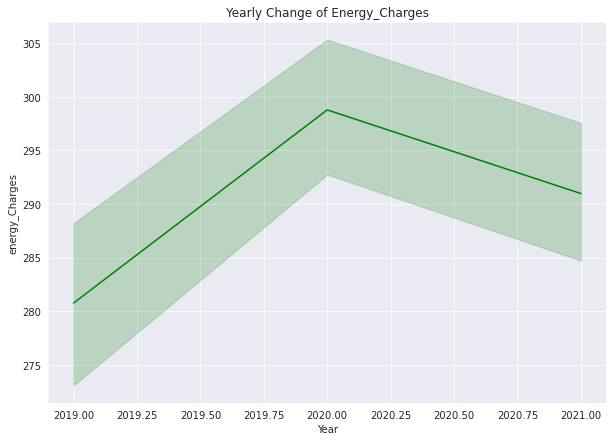

In [311]:
#yearly change of Energy_Charges
plt.figure(figsize=(10,7))
sns.lineplot(x="Year", y="energy_Charges",color='green',data=df3)
plt.title("Yearly Change of Energy_Charges")

Text(0.5, 1.0, 'Yearly Change of Energy_Charges')

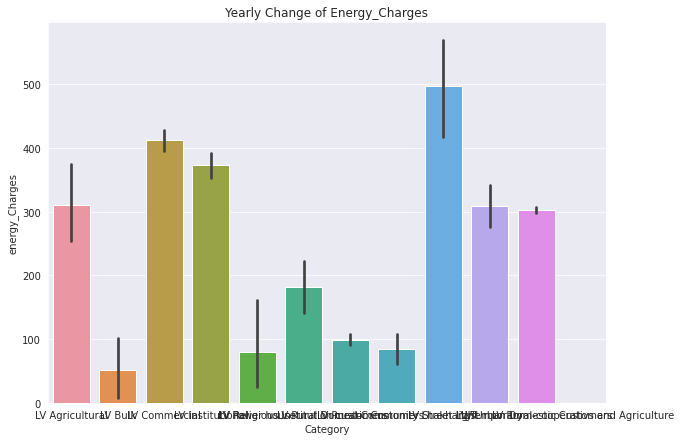

In [312]:
#yearly change of Energy_Charges
plt.figure(figsize=(10,7))
sns.barplot(x="Category", y="energy_Charges",data=df3)
plt.title("Yearly Change of Energy_Charges")

Text(0.5, 1.0, 'Yearly Change of Energy_Charges')

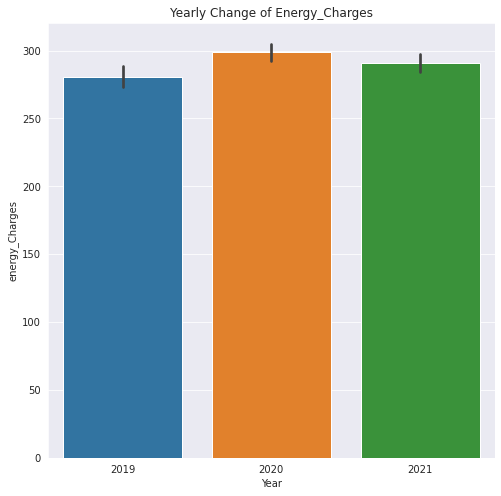

In [313]:
plt.figure(figsize=(8,8))
sns.barplot(x="Year", y="energy_Charges",data=df3)
plt.title("Yearly Change of Energy_Charges")

Text(0.5, 1.0, 'Change in Consumption with respect to Current')

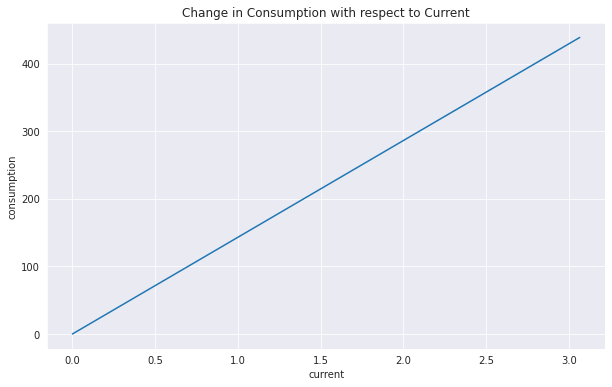

In [314]:
# Change in Consumption with respect to Current

plt.figure(figsize=(10,6))
sns.lineplot(x="current", y="consumption",data=df3)
plt.title("Change in Consumption with respect to Current")

Text(0.5, 1.0, 'Change in Consumption with respect to Current')

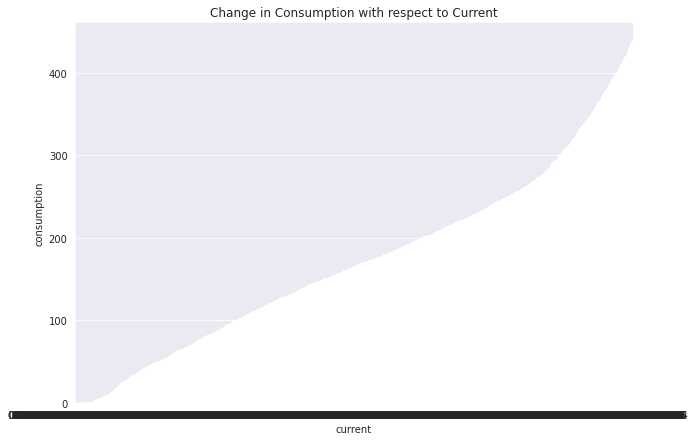

In [315]:
plt.figure(figsize=(10,7))
sns.barplot(x="current", y="consumption",data=df3)
plt.title("Change in Consumption with respect to Current")

Text(0.5, 1.0, 'Power Consumption of each Category')

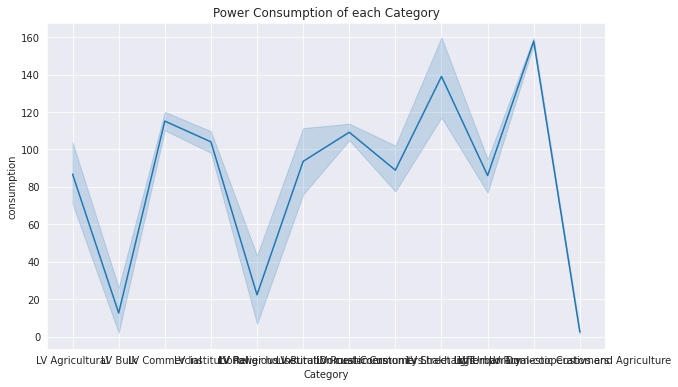

In [316]:
# Power Consumption of each Category

plt.figure(figsize=(10,6))
sns.lineplot(x="Category", y="consumption",data=df3)
plt.title("Power Consumption of each Category")

Text(0.5, 1.0, 'Power Consumption of each Category')

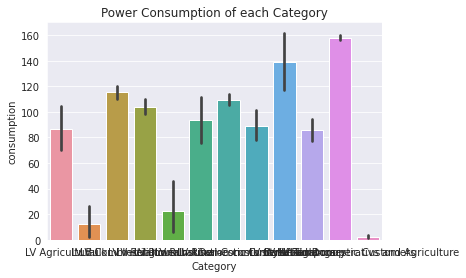

In [317]:
# plt.figure(figsize=(10,7))
sns.barplot(x="Category", y="consumption",data=df3)
plt.title("Power Consumption of each Category")
# plt.xticks(fontsize = 11, rotation=90)

Text(0.5, 1.0, 'Power Consumption of each Portion')

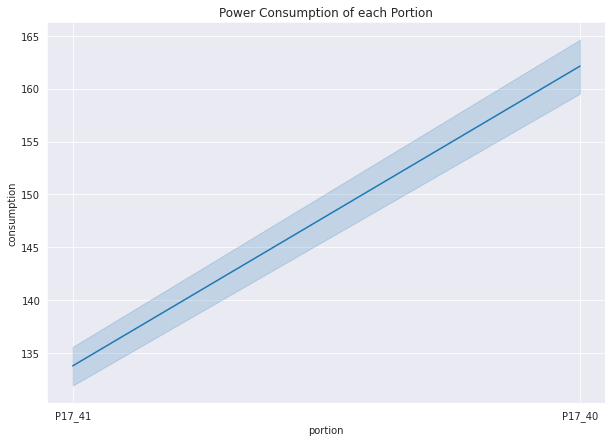

In [318]:
# Power Consumption in each Portion

plt.figure(figsize=(10,7))
sns.lineplot(x="portion", y="consumption",data=df3)
plt.title("Power Consumption of each Portion")

Text(0.5, 1.0, 'Power Consumption of each Portion')

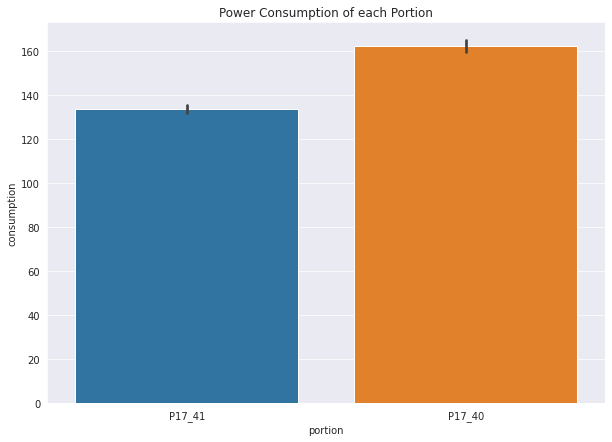

In [319]:
plt.figure(figsize=(10,7))
sns.barplot(x="portion", y="consumption",data=df3)
plt.title("Power Consumption of each Portion")

Text(0.5, 1.0, 'Monthly Power Consumption ')

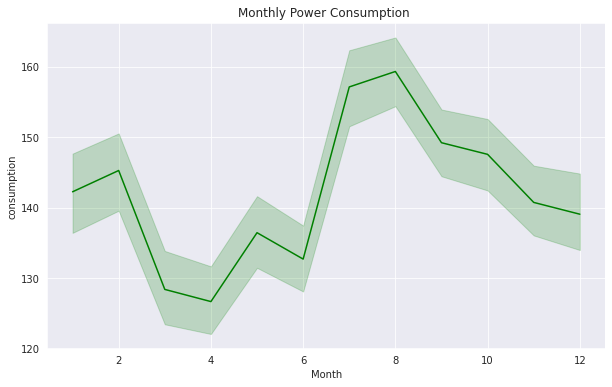

In [320]:
# Monthly Power Consumption 

plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="consumption",color="green",data=df3)
plt.title("Monthly Power Consumption ")

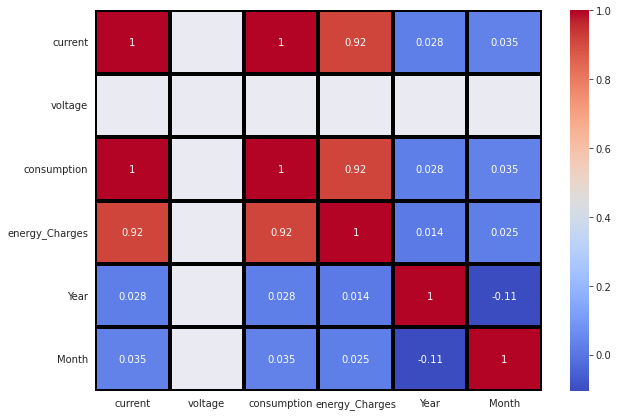

In [321]:
# corr = df3.corr()

# plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

corrMatrix = df3.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

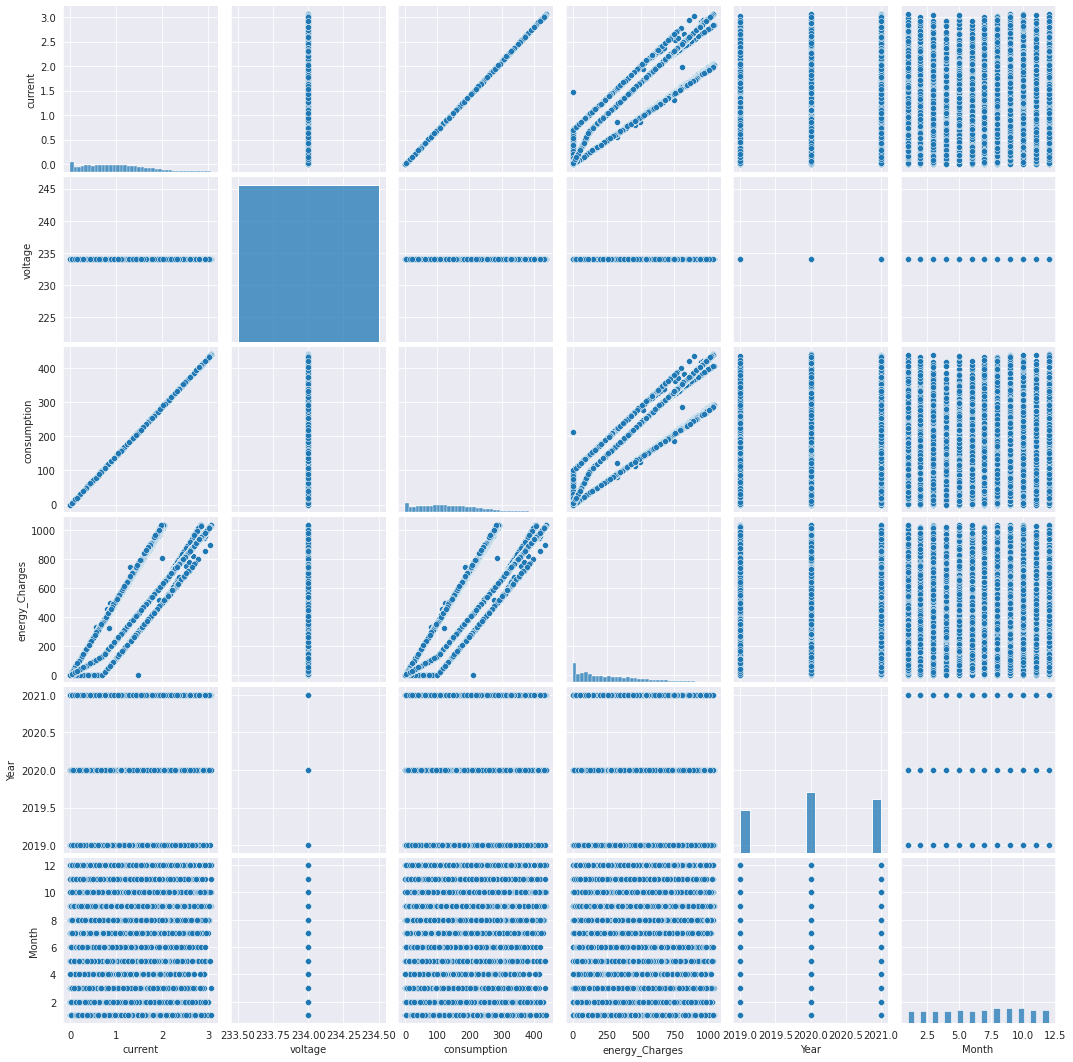

In [322]:
 sns.pairplot(df3)
 plt.show()

# 6. ENCODING

In [323]:
df3.tail()

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
23596,LV Urban Domestic Customers,P17_41,1.047428,234.0,150.0,262.00,2021,12
23601,LV Urban Domestic Customers,P17_41,1.585107,234.0,227.0,468.36,2021,12
23603,LV Urban Domestic Customers,P17_41,1.529244,234.0,219.0,446.92,2021,12
23604,LV Urban Domestic Customers,P17_41,0.628457,234.0,90.0,115.20,2021,12
23606,LV Urban Domestic Customers,P17_41,0.279314,234.0,40.0,51.20,2021,12


In [324]:
# unique values in each columns
for x in df3.columns:
    #prinfting unique values
    print(x ,':', len(df3[x].unique()))

Category : 12
portion : 2
current : 1845
voltage : 1
consumption : 1845
energy_Charges : 3170
Year : 3
Month : 12


In [325]:
df3['Category'].value_counts()

LV Urban Domestic Customers             10699
LV Rural Domestic Customers              1412
LV Commercial                            1257
LV Institutional                          821
LV Temporary                              306
LV Rural-Community Lhakhangs              217
LV Religious Institution customers        158
LV Street light                            63
LV Bulk                                    40
LV Agricultural                            33
LV Power house                             31
LV Rural-cooperativs and Agriculture       25
Name: Category, dtype: int64

In [326]:
label_encoder = preprocessing.LabelEncoder()
df3['Category'] = label_encoder.fit_transform(df3['Category'])
print(df3.head())

    Category portion   current  voltage  consumption  energy_Charges  Year  \
0          0  P17_41  1.166136    234.0        167.0          589.51  2019   
2          1  P17_41  0.000000    234.0          0.0            0.00  2019   
10         2  P17_41  0.775096    234.0        111.0          391.83  2019   
11         2  P17_41  1.180102    234.0        169.0          596.57  2019   
13         2  P17_41  1.871404    234.0        268.0          946.04  2019   

    Month  
0       1  
2       1  
10      1  
11      1  
13      1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [327]:
df3.head(100)

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
0,0,P17_41,1.166136,234.0,167.0,589.51,2019,1
2,1,P17_41,0.000000,234.0,0.0,0.00,2019,1
10,2,P17_41,0.775096,234.0,111.0,391.83,2019,1
11,2,P17_41,1.180102,234.0,169.0,596.57,2019,1
13,2,P17_41,1.871404,234.0,268.0,946.04,2019,1
...,...,...,...,...,...,...,...,...
152,6,P17_41,2.562706,234.0,367.0,772.51,2019,1
153,6,P17_41,0.733199,234.0,105.0,13.40,2019,1
154,6,P17_41,1.410536,234.0,202.0,273.36,2019,1
155,6,P17_41,1.096307,234.0,157.0,152.76,2019,1


In [328]:
df3.Category.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11,  8])

In [329]:
df3['portion'].value_counts()

P17_41    10391
P17_40     4671
Name: portion, dtype: int64

In [330]:
label_encoder = preprocessing.LabelEncoder()
df3['portion'] = label_encoder.fit_transform(df3['portion'])
print(df3.head())

    Category  portion   current  voltage  consumption  energy_Charges  Year  \
0          0        1  1.166136    234.0        167.0          589.51  2019   
2          1        1  0.000000    234.0          0.0            0.00  2019   
10         2        1  0.775096    234.0        111.0          391.83  2019   
11         2        1  1.180102    234.0        169.0          596.57  2019   
13         2        1  1.871404    234.0        268.0          946.04  2019   

    Month  
0       1  
2       1  
10      1  
11      1  
13      1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [331]:
df3.dtypes

Category            int64
portion             int64
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

# 7. TRAIN AND TEST SPLIT




In [332]:
# Input:
X = df3[['Year','Month','current','voltage','Category','portion']]

# Output:
y = df3['consumption']

In [333]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [334]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [335]:
X_test.head()

,Year,Month,current,voltage,Category,portion
22192,2021,10,1.152170,234.0,11,0
14817,2020,12,1.221999,234.0,11,0
2437,2019,6,1.159153,234.0,11,1
10718,2020,6,0.530697,234.0,11,1
2877,2019,7,0.321211,234.0,11,1


In [336]:
y_test.head()

22192    165.0
14817    175.0
2437     166.0
10718     76.0
2877      46.0
Name: consumption, dtype: float64

In [337]:
# Printing shapes of testing and training sets :

print("shape of original dataset :", df3.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (15062, 8)
shape of input - training set (10543, 6)
shape of output - training set (10543,)
shape of input - testing set (4519, 6)
shape of output - testing set (4519,)


In [338]:
df3.dtypes

Category            int64
portion             int64
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

#7.1: Linear Regression Algorithm

In [339]:
# TRAINING REGRESSION MODEL

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [340]:
# PREDICTION

y_pred_LR = LR_model.predict(X_test)
#y_pred_LR

In [341]:
from sklearn import metrics
from sklearn.metrics import r2_score

LR_MAE = metrics.mean_absolute_error(y_test, y_pred_LR)
LR_MSE = metrics.mean_squared_error(y_test, y_pred_LR)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
LR_R2 = r2_score(y_test,y_pred_LR)
print('Mean Absolute Error:', LR_MAE)
print('MSE: ', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)
print('Root Mean Squared Error: ', LR_R2)

Mean Absolute Error: 1.3658395322042197e-13
MSE:  2.798069776638346e-26
Root Mean Squared Error: 1.672743189087418e-13
Root Mean Squared Error:  1.0


In [342]:
LR_model.intercept_

1.950866135302931e-10

In [343]:
LR_model.coef_

array([-8.69543893e-14,  4.44089210e-15,  1.43208000e+02, -8.43769499e-14,
        6.88338275e-15, -1.72084569e-14])

In [344]:
# REGRESSION MODEL EVALUTION

Y_train_predicted_LR = LR_model.predict(X_train)
Y_test_predicted_LR = LR_model.predict(X_test)
LR_train_accuracy = r2_score(y_train,Y_train_predicted_LR)
LR_test_accuracy = r2_score(y_test,Y_test_predicted_LR)  
print("Train set accuracy of regression model: ",LR_train_accuracy)
print("Test set accuracy of regression model: ",LR_test_accuracy)

Train set accuracy of regression model:  1.0
Test set accuracy of regression model:  1.0


In [345]:
LR_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_LR})
LR_Result.head()

,Actual Consumption,Predicted Consumption
22192,165.0,165.0
14817,175.0,175.0
2437,166.0,166.0
10718,76.0,76.0
2877,46.0,46.0


In [346]:
LR_model.predict([[2019,1,0.775096,234.0,2,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([110.99994797])

# 7.2: RANDOM FOREST ALGORITHM

In [347]:
# TRAINING RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=200)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [348]:
#PREDICTION

y_pred_RF = RF_model.predict(X_test)
#y_pred_RF

In [349]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

RF_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
RF_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
RF_R2 = r2_score(y_test,y_pred_RF)
print('Mean Absolute Error:', RF_MAE)
print('MSE: ', RF_MSE)
print('Root Mean Squared Error:', RF_RMSE)
print('R2 Score: ', RF_R2)

Mean Absolute Error: 0.013733668953306351
MSE:  0.0034088290113963035
Root Mean Squared Error: 0.058385178011172524
R2 Score:  0.9999996068702683


In [350]:
# EVALUTION 

Y_train_predicted_RF = RF_model.predict(X_train)
Y_test_predicted_RF = RF_model.predict(X_test)
RF_train_accuracy = r2_score(y_train,Y_train_predicted_RF)
RF_test_accuracy = r2_score(y_test,Y_test_predicted_RF)
print("Train set accuracy of RandomForest model: ",RF_train_accuracy)
print("Test set accuracy of RandomForest model: ",RF_test_accuracy)

Train set accuracy of RandomForest model:  0.9999999420694791
Test set accuracy of RandomForest model:  0.9999996068702683


In [351]:
RF_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_RF})
RF_Result.head()

,Actual Consumption,Predicted Consumption
22192,165.0,165.0
14817,175.0,175.0
2437,166.0,166.0
10718,76.0,76.0
2877,46.0,46.0


In [352]:
import numpy as np
#X = df3[['Year','Month','current','voltage','Category','portion']]
# y1 = np.array([2019,1,1.166136,234.0,0,1])
# y1 = np.array([2019,1,0.775096,234.0,2,0])
# np = y1.reshape(-1,6)
# RF_model.predict(np)
RF_model.predict([[2019,1,0.775096,234.0,2,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([111.])

# 7.3: DECISION TREE

In [353]:
#TRAIN

from sklearn.tree import DecisionTreeRegressor

In [354]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [355]:
# PREDICT

y_pred_DT = DT_model.predict(X_test)
#y_pred_DT

In [356]:
from sklearn.metrics import r2_score
import numpy as np

DT_MAE = metrics.mean_absolute_error(y_test, y_pred_DT)
DT_MSE = metrics.mean_squared_error(y_test, y_pred_DT)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
DT_R2 = r2_score(y_test,y_pred_DT)
print('Mean Absolute Error:', DT_MAE)
print('MSE: ', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)
print("R2 score : ", DT_R2)

Mean Absolute Error: 2.977757011035233
MSE:  13.129975554918834
Root Mean Squared Error: 3.62353081329783
R2 score :  0.9984857604327141


In [357]:
# EVALUTION 

Y_train_predicted_DT = DT_model.predict(X_train)
Y_test_predicted_DT = DT_model.predict(X_test)
DT_train_accuracy = r2_score(y_train,Y_train_predicted_DT)
DT_test_accuracy = r2_score(y_test,Y_test_predicted_DT)
print("Train set accuracy of DecisionTree model: ",DT_train_accuracy)
print("Test set accuracy of DecisionTree model: ",DT_test_accuracy)

Train set accuracy of DecisionTree model:  0.9985533591644343
Test set accuracy of DecisionTree model:  0.9984857604327141


In [358]:
DT_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_DT})
DT_Result.head()

,Actual Consumption,Predicted Consumption
22192,165.0,163.442097
14817,175.0,175.263002
2437,166.0,163.442097
10718,76.0,72.524753
2877,46.0,41.055918


In [359]:
DT_model.predict([[2019,1,0.775096,234.0,2,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([112.38776923])

# 7.4: KNN ALGORITHM

In [360]:
from sklearn.neighbors import KNeighborsRegressor

In [361]:
KNN_model = KNeighborsRegressor(10)
KNN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [362]:
y_pred_KNN = KNN_model.predict(X_test)
#y_pred_KNN

In [363]:
KNN_MAE = metrics.mean_absolute_error(y_test, y_pred_KNN)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred_KNN)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN))
KNN_R2 = r2_score(y_test,y_pred_KNN)
print('Mean Absolute Error:', KNN_MAE)
print('MSE: ', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)
print("R2 score : ",KNN_R2)

Mean Absolute Error: 8.798599690196946
MSE:  282.52244541889803
Root Mean Squared Error: 16.808404011651376
R2 score :  0.9674175581127097


In [364]:
# EVALUTION 

Y_train_predicted_KNN = KNN_model.predict(X_train)
Y_test_predicted_KNN = KNN_model.predict(X_test)
KNN_train_accuracy = r2_score(y_train,Y_train_predicted_KNN)
KNN_test_accuracy = r2_score(y_test,Y_test_predicted_KNN)
print("Train set accuracy of DecisionTree model: ",KNN_train_accuracy)
print("Test set accuracy of DecisionTree model: ",KNN_train_accuracy)

Train set accuracy of DecisionTree model:  0.9733510622016237
Test set accuracy of DecisionTree model:  0.9733510622016237


In [365]:
KNN_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_KNN})
KNN_Result.head()

,Actual Consumption,Predicted Consumption
22192,165.0,162.4
14817,175.0,174.1
2437,166.0,164.6
10718,76.0,76.6
2877,46.0,45.8


In [366]:
KNN_model.predict([[2019,1,0.775096,234.0,2,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([116.7])

# 8. COMPARISION AND CONCLUSION

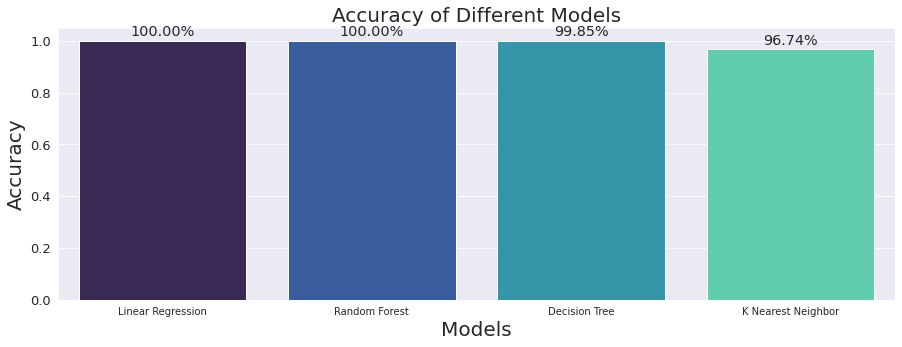

In [367]:
mylist=[]
mylist2=[]
mylist.append(LR_test_accuracy)
mylist2.append("Linear Regression",)
mylist.append(RF_test_accuracy)
mylist2.append("Random Forest",)
mylist.append(DT_test_accuracy)
mylist2.append("Decision Tree")
mylist.append(KNN_test_accuracy)
mylist2.append("K Nearest Neighbor")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Different Models", fontsize = 20)
# plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [368]:
# ERRORS
data = {"Model": ["Linear Regression", "Random Forest","Decision Tree", "K Nearest Neighbor"], 
        "MSE": [LR_MSE, RF_MSE, DT_MSE, KNN_MSE],         
        "RMSE": [LR_RMSE, RF_RMSE, DT_RMSE, KNN_RMSE],
        "MAE": [LR_MAE,RF_MAE, DT_MAE, KNN_MAE],
        "R2": [LR_MAE,RF_MAE, DT_MAE, KNN_MAE]}

results = pd.DataFrame(data=data)
results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,2.798070e-26,1.672743e-13,1.365840e-13,1.365840e-13
1,Random Forest,3.408829e-03,5.838518e-02,1.373367e-02,1.373367e-02
2,Decision Tree,1.312998e+01,3.623531e+00,2.977757e+00,2.977757e+00
3,K Nearest Neighbor,2.825224e+02,1.680840e+01,8.798600e+00,8.798600e+00



**CONCLUSION :**

From all the above result we can conclude that the best algorithm is the Linear Regression Algorithm for this project because it has higher accuracy and low Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R-squared score compared to other algorithms.